# Higgs Physics Assignment

## Problem 2a

The likelihood function for the experiment is given by

$$ \mathcal{L} = \displaystyle \prod_{i=1}^{2} \frac{\lambda_i^{N_i}e^{-\lambda_i}}{N_i!} $$

where $\lambda_i$ is the expected number of events in a signal region, given by

$$ \lambda_i = \mu_{VBF}\cdot n_{VBF} + \mu_{ggf}\cdot n_{ggf} + n_b $$

and $N_i$ is the observed number of events in a signal region. 



In [ ]:
from iminuit import Minuit
import numpy as np
import math
from matplotlib import pyplot as plt

In [41]:
def poisson(mu, k):
    
    return (mu**(k))*np.exp(-1*mu)/(math.factorial(k))

def nll(par, mu_vbf, mu_ggf): #n_vbf1, n_ggf1, n_b1, N1, n_vbf2, n_ggf2, n_b2, N2,
    p1 = poisson(par[0]*mu_vbf + par[1]*mu_ggf + par[2], par[3])
    p2 = poisson(par[4]*mu_vbf + par[5]*mu_ggf + par[6], par[7])
    return -1*np.log(p1 +p2)

def fcn(mu_vbf, mu_ggf):
    f = nll(par, mu_vbf, mu_ggf)
    return f


In [50]:
par = [0.9, 16.2, 5.2, 24, 4.2, 2.1, 0.9, 8]

m = Minuit(fcn, mu_vbf = 1.0, mu_ggf = 1.0)
m.limits = [(-10.0, 10.0), (-10.0, 10.0)]
#m.fixed["mu_vbf"] = True
m.errordef = Minuit.LIKELIHOOD
m.migrad()
m.hesse()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 1.511                      │              Nfcn = 35               │
│ EDM = 1.3e-05 (Goal: 0.1)        │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu_vbf │    1.1    │    0.9    │            │            │   -10   │   10    │       │
│ 1 │ mu_ggf │    1.1    │    0.5    │            │            │   -10   │   10    │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬───────────────┐
│        │ mu_vbf mu_ggf │
├────────┼───────────────┤
│ mu_vbf │  0.824 -0.173 │
│ mu_ggf │ -0.173  0.265 │
└────────┴───────────────┘

In [51]:
m.values

<ValueView mu_vbf=1.1428187103661536 mu_ggf=1.0944686062872684>

In [52]:
m.errors

<ErrorView mu_vbf=0.9064430934979981 mu_ggf=0.5141713321926638>

(array([-0.66995713, -0.6333354 , -0.59671366, -0.56009193, -0.52347019,
        -0.48684846, -0.45022673, -0.41360499, -0.37698326, -0.34036152,
        -0.30373979, -0.26711806, -0.23049632, -0.19387459, -0.15725285,
        -0.12063112, -0.08400938, -0.04738765, -0.01076592,  0.02585582,
         0.06247755,  0.09909929,  0.13572102,  0.17234275,  0.20896449,
         0.24558622,  0.28220796,  0.31882969,  0.35545143,  0.39207316,
         0.42869489,  0.46531663,  0.50193836,  0.5385601 ,  0.57518183,
         0.61180356,  0.6484253 ,  0.68504703,  0.72166877,  0.7582905 ,
         0.79491224,  0.83153397,  0.8681557 ,  0.90477744,  0.94139917,
         0.97802091,  1.01464264,  1.05126437,  1.08788611,  1.12450784,
         1.16112958,  1.19775131,  1.23437305,  1.27099478,  1.30761651,
         1.34423825,  1.38085998,  1.41748172,  1.45410345,  1.49072518,
         1.52734692,  1.56396865,  1.60059039,  1.63721212,  1.67383386,
         1.71045559,  1.74707732,  1.78369906,  1.8

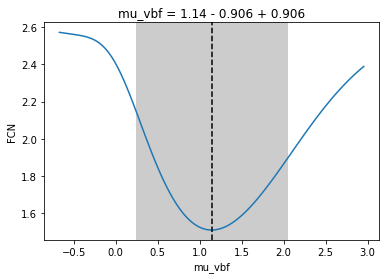

In [44]:
m.draw_profile("mu_vbf")

(array([0.06618856, 0.0869619 , 0.10773523, 0.12850856, 0.1492819 ,
        0.17005523, 0.19082857, 0.2116019 , 0.23237524, 0.25314857,
        0.2739219 , 0.29469524, 0.31546857, 0.33624191, 0.35701524,
        0.37778858, 0.39856191, 0.41933524, 0.44010858, 0.46088191,
        0.48165525, 0.50242858, 0.52320191, 0.54397525, 0.56474858,
        0.58552192, 0.60629525, 0.62706859, 0.64784192, 0.66861525,
        0.68938859, 0.71016192, 0.73093526, 0.75170859, 0.77248193,
        0.79325526, 0.81402859, 0.83480193, 0.85557526, 0.8763486 ,
        0.89712193, 0.91789527, 0.9386686 , 0.95944193, 0.98021527,
        1.0009886 , 1.02176194, 1.04253527, 1.0633086 , 1.08408194,
        1.10485527, 1.12562861, 1.14640194, 1.16717528, 1.18794861,
        1.20872194, 1.22949528, 1.25026861, 1.27104195, 1.29181528,
        1.31258862, 1.33336195, 1.35413528, 1.37490862, 1.39568195,
        1.41645529, 1.43722862, 1.45800196, 1.47877529, 1.49954862,
        1.52032196, 1.54109529, 1.56186863, 1.58

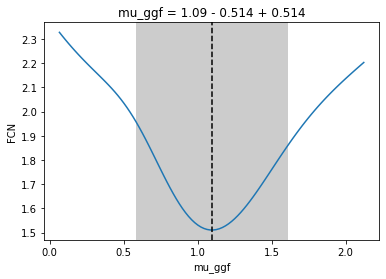

In [37]:
m.draw_profile("mu_ggf")

In [53]:
par = [0.9, 16.2, 5.2, 24, 4.2, 2.1, 0.9, 8]

m = Minuit(fcn, mu_vbf = 1.0, mu_ggf = 1.0)
m.limits = [(-10.0, 10.0), (-10.0, 10.0)]
m.fixed["mu_vbf"] = True
m.errordef = Minuit.LIKELIHOOD
m.migrad()
m.hesse()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 1.524                      │              Nfcn = 18               │
│ EDM = 3.87e-05 (Goal: 0.1)       │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu_vbf │   1.00    │   0.01    │            │            │   -10   │   10    │  yes  │
│ 1 │ mu_ggf │    1.1    │    0.5    │            │            │   -10   │   10    │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬───────────────┐
│        │ mu_vbf mu_ggf │
├────────┼───────────────┤
│ mu_vbf │  0.000  0.000 │
│ mu_ggf │  0.000  0.231 │
└────────┴───────────────┘

In [55]:
m.values

<ValueView mu_vbf=1.0 mu_ggf=1.1241512447366997>

In [56]:
m.errors

<ErrorView mu_vbf=0.01 mu_ggf=0.4804648961483018>

(array([0.16322135, 0.18263407, 0.2020468 , 0.22145952, 0.24087225,
        0.26028497, 0.2796977 , 0.29911042, 0.31852315, 0.33793587,
        0.3573486 , 0.37676132, 0.39617405, 0.41558678, 0.4349995 ,
        0.45441223, 0.47382495, 0.49323768, 0.5126504 , 0.53206313,
        0.55147585, 0.57088858, 0.5903013 , 0.60971403, 0.62912675,
        0.64853948, 0.6679522 , 0.68736493, 0.70677765, 0.72619038,
        0.7456031 , 0.76501583, 0.78442855, 0.80384128, 0.823254  ,
        0.84266673, 0.86207945, 0.88149218, 0.90090491, 0.92031763,
        0.93973036, 0.95914308, 0.97855581, 0.99796853, 1.01738126,
        1.03679398, 1.05620671, 1.07561943, 1.09503216, 1.11444488,
        1.13385761, 1.15327033, 1.17268306, 1.19209578, 1.21150851,
        1.23092123, 1.25033396, 1.26974668, 1.28915941, 1.30857213,
        1.32798486, 1.34739758, 1.36681031, 1.38622303, 1.40563576,
        1.42504849, 1.44446121, 1.46387394, 1.48328666, 1.50269939,
        1.52211211, 1.54152484, 1.56093756, 1.58

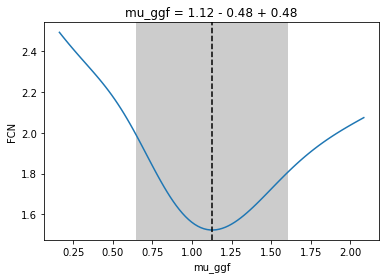

In [46]:
m.draw_profile("mu_ggf")

In [57]:
m = Minuit(fcn, mu_vbf = 1.0, mu_ggf = 1.0)
m.limits = [(-10.0, 10.0), (-10.0, 10.0)]
m.fixed["mu_ggf"] = True
m.errordef = Minuit.LIKELIHOOD
m.migrad()
m.hesse()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 1.529                      │              Nfcn = 19               │
│ EDM = 4.27e-05 (Goal: 0.1)       │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu_vbf │    1.2    │    0.8    │            │            │   -10   │   10    │       │
│ 1 │ mu_ggf │   1.00    │   0.01    │            │            │   -10   │   10    │  yes  │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬───────────────┐
│        │ mu_vbf mu_ggf │
├────────┼───────────────┤
│ mu_vbf │  0.704  0.000 │
│ mu_ggf │  0.000  0.000 │
└────────┴───────────────┘

In [58]:
m.values

<ValueView mu_vbf=1.1980201261418273 mu_ggf=1.0>

In [59]:
m.errors

<ErrorView mu_vbf=0.8378132086592744 mu_ggf=0.01>

(array([-0.47760629, -0.44375526, -0.40990422, -0.37605318, -0.34220214,
        -0.3083511 , -0.27450006, -0.24064902, -0.20679798, -0.17294695,
        -0.13909591, -0.10524487, -0.07139383, -0.03754279, -0.00369175,
         0.03015929,  0.06401033,  0.09786137,  0.1317124 ,  0.16556344,
         0.19941448,  0.23326552,  0.26711656,  0.3009676 ,  0.33481864,
         0.36866968,  0.40252071,  0.43637175,  0.47022279,  0.50407383,
         0.53792487,  0.57177591,  0.60562695,  0.63947799,  0.67332902,
         0.70718006,  0.7410311 ,  0.77488214,  0.80873318,  0.84258422,
         0.87643526,  0.9102863 ,  0.94413734,  0.97798837,  1.01183941,
         1.04569045,  1.07954149,  1.11339253,  1.14724357,  1.18109461,
         1.21494565,  1.24879668,  1.28264772,  1.31649876,  1.3503498 ,
         1.38420084,  1.41805188,  1.45190292,  1.48575396,  1.51960499,
         1.55345603,  1.58730707,  1.62115811,  1.65500915,  1.68886019,
         1.72271123,  1.75656227,  1.79041331,  1.8

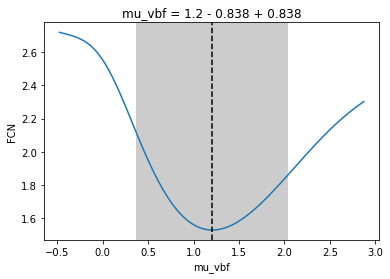

In [48]:
m.draw_profile("mu_vbf")